# Pandas for Data Analysis (Part 2 of 2)

In [1]:
import numpy as np
import pandas as pd

### Creating a DataFrame

In [3]:
index = pd.DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'], name='DateTime', freq='D')
index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04'], dtype='datetime64[ns]', name='DateTime', freq='D')

In [5]:
columns = ['A', 'B', 'C']
columns

['A', 'B', 'C']

In [7]:
values = np.array([[0.1, np.NaN, 100],
                   [1.3, 1.0,      0.4],
                   [0.8, 1.0,      0.9],
                   [0.6, np.NaN, 1.5]])
values

array([[  0.1,   nan, 100. ],
       [  1.3,   1. ,   0.4],
       [  0.8,   1. ,   0.9],
       [  0.6,   nan,   1.5]])

In [9]:
df = pd.DataFrame(values, index=index, columns=columns)
df

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


### Mean and Cumsum

In [11]:
df.mean()  # Mean of each column

A     0.7
B     1.0
C    25.7
dtype: float64

In [13]:
df.A.mean() 

0.7000000000000001

In [15]:
df.mean(axis=1)  # Mean of each row

DateTime
2022-01-01    50.05
2022-01-02     0.90
2022-01-03     0.90
2022-01-04     1.05
Freq: D, dtype: float64

In [17]:
df

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


In [19]:
df.apply(np.cumsum, axis=0)  # Cumulative sum along each column

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.4,1.0,100.4
2022-01-03,2.2,2.0,101.3
2022-01-04,2.8,NaN,102.8


In [21]:
df

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


In [23]:
df.sum()

A      2.8
B      2.0
C    102.8
dtype: float64

In [25]:
df.B.sum()

2.0

In [27]:
df.sum(axis=1)

DateTime
2022-01-01    100.1
2022-01-02      2.7
2022-01-03      2.7
2022-01-04      2.1
Freq: D, dtype: float64

In [29]:
df.apply(np.cumsum, axis=1)  # Cumulative sum along each row

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.1
2022-01-02,1.3,2.3,2.7
2022-01-03,0.8,1.8,2.7
2022-01-04,0.6,NaN,2.1


### Breaking and Joining DataFrames

In [31]:
df

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


In [33]:
df.iloc[:1]  # Zeroth row

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0


In [35]:
df.iloc[1:3]  # Second and third rows

,A,B,C
DateTime,,,
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9


In [37]:
df.iloc[-1:]  # Last row

,A,B,C
DateTime,,,
2022-01-04,0.6,NaN,1.5


In [ ]:
df.iloc[-1:]  # Last row

In [39]:
pd.concat([df.iloc[:1], df.iloc[1:3], df.iloc[3:]])  # Concatenation

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


In [41]:
df.iloc[:, 0]  # Zeroth column

DateTime
2022-01-01    0.1
2022-01-02    1.3
2022-01-03    0.8
2022-01-04    0.6
Freq: D, Name: A, dtype: float64

In [43]:
df.iloc[:, 1:]  # The rest of the columns

,B,C
DateTime,,
2022-01-01,NaN,100.0
2022-01-02,1.0,0.4
2022-01-03,1.0,0.9
2022-01-04,NaN,1.5


In [45]:
pd.concat([df.iloc[:, 0], df.iloc[:, 1:]], axis=1)  # Concatenation

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


### Grouping

In [47]:
dict3 = {'Day':   ['Mon',   'Tue',   'Mon',    'Tue',    'Mon'],
         'Fruit': ['Apple', 'Apple', 'Banana', 'Banana', 'Apple'],
         'Pound': [10,      15,      50,       40,       5],
         'Profit':[20,      30,      25,       20,       10]}
df3 = pd.DataFrame(dict3)
df3

,Day,Fruit,Pound,Profit
0,Mon,Apple,10,20
1,Tue,Apple,15,30
2,Mon,Banana,50,25
3,Tue,Banana,40,20
4,Mon,Apple,5,10


In [49]:
df3.groupby('Day').sum()  # Group and apply sum() to the resulting groups


,Fruit,Pound,Profit
Day,,,
Mon,AppleBananaApple,65,55
Tue,AppleBanana,55,50


In [51]:
df3.groupby('Fruit').sum()

,Day,Pound,Profit
Fruit,,,
Apple,MonTueMon,30,60
Banana,MonTue,90,45


In [ ]:
df3

In [53]:
df3.groupby(['Day', 'Fruit']).sum()  # Grouping by multiple columns

Pound  Profit
Day Fruit                
Mon Apple      15      30
    Banana     50      25
Tue Apple      15      30
    Banana     40      20

In [55]:
stacked = df3.stack()  # Stacking
stacked

0  Day          Mon
   Fruit      Apple
   Pound         10
   Profit        20
1  Day          Tue
   Fruit      Apple
   Pound         15
   Profit        30
2  Day          Mon
   Fruit     Banana
   Pound         50
   Profit        25
3  Day          Tue
   Fruit     Banana
   Pound         40
   Profit        20
4  Day          Mon
   Fruit      Apple
   Pound          5
   Profit        10
dtype: object

In [57]:
stacked.unstack(1) # original

,Day,Fruit,Pound,Profit
0,Mon,Apple,10,20
1,Tue,Apple,15,30
2,Mon,Banana,50,25
3,Tue,Banana,40,20
4,Mon,Apple,5,10


In [59]:
stacked.unstack(0) # the transpose

,0,1,2,3,4
Day,Mon,Tue,Mon,Tue,Mon
Fruit,Apple,Apple,Banana,Banana,Apple
Pound,10,15,50,40,5
Profit,20,30,25,20,10


### Math Operations

In [61]:
df1 = pd.DataFrame({'A': [0, 1, 2], 'B': [10, 11, 12]})
df1

,A,B
0,0,10
1,1,11
2,2,12


In [65]:
df2 = -df1
df2

,A,B
0,0,-10
1,-1,-11
2,-2,-12


In [67]:
df2.columns = ['A', 'C']
df2

,A,C
0,0,-10
1,-1,-11
2,-2,-12


In [69]:
df1 + df2

,A,B,C
0,0,NaN,NaN
1,0,NaN,NaN
2,0,NaN,NaN


In [71]:
df1 - df2

,A,B,C
0,0,NaN,NaN
1,2,NaN,NaN
2,4,NaN,NaN


In [73]:
df1 * df2

,A,B,C
0,0,NaN,NaN
1,-1,NaN,NaN
2,-4,NaN,NaN


In [75]:
df1 / df2

,A,B,C
0,NaN,NaN,NaN
1,-1.0,NaN,NaN
2,-1.0,NaN,NaN


In [77]:
np.sin(df1)

,A,B
0,0.000000,-0.544021
1,0.841471,-0.999990
2,0.909297,-0.536573


In [79]:
df2

,A,C
0,0,-10
1,-1,-11
2,-2,-12


In [81]:
np.sqrt(df2) # mathematicallyy, no square root of negative values

C:\Users\yasee\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


,A,C
0,0.0,NaN
1,NaN,NaN
2,NaN,NaN


### Read and Write CSV/Excel Files

- CSV (comma separated values) files.

In [83]:
df

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


In [85]:
df.to_csv('mgmt50410292024.csv') # Export to CSV file

<img src="images/csv.png" alt="CSV File" style="width: 300px;"/>

In [87]:
df2 = pd.read_csv('mydf.csv', index_col = 'DateTime', na_values='NaN')
df2

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


In [89]:
df.to_excel('mydf.xlsx', sheet_name='Sheet1') # Export to Excel

<img src="images/excel.png" alt="Excel File" style="width: 350px;"/>

In [91]:
df2 = pd.read_excel('mydf.xlsx', 'Sheet1', index_col='DateTime', na_values='NaN')
df2

,A,B,C
DateTime,,,
2022-01-01,0.1,NaN,100.0
2022-01-02,1.3,1.0,0.4
2022-01-03,0.8,1.0,0.9
2022-01-04,0.6,NaN,1.5


### Simple Plotting

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
index = pd.date_range(start='2022-01-01 00:00:00', end='2022-01-01 23:59:00', freq='30min')
index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 00:30:00',
               '2022-01-01 01:00:00', '2022-01-01 01:30:00',
               '2022-01-01 02:00:00', '2022-01-01 02:30:00',
               '2022-01-01 03:00:00', '2022-01-01 03:30:00',
               '2022-01-01 04:00:00', '2022-01-01 04:30:00',
               '2022-01-01 05:00:00', '2022-01-01 05:30:00',
               '2022-01-01 06:00:00', '2022-01-01 06:30:00',
               '2022-01-01 07:00:00', '2022-01-01 07:30:00',
               '2022-01-01 08:00:00', '2022-01-01 08:30:00',
               '2022-01-01 09:00:00', '2022-01-01 09:30:00',
               '2022-01-01 10:00:00', '2022-01-01 10:30:00',
               '2022-01-01 11:00:00', '2022-01-01 11:30:00',
               '2022-01-01 12:00:00', '2022-01-01 12:30:00',
               '2022-01-01 13:00:00', '2022-01-01 13:30:00',
               '2022-01-01 14:00:00', '2022-01-01 14:30:00',
               '2022-01-01 15:00:00', '2022-01-01 15:30:00',
               '2022-01-

In [97]:
N = len(index)
N

48

In [99]:
data=np.random.randn(N, 3)
data

array([[-1.36816440e+00,  1.24003129e+00, -2.29507047e+00],
       [ 2.21686200e-01,  6.32223126e-01, -3.93121611e-01],
       [-1.33111671e+00, -2.73367277e-01, -7.86147278e-01],
       [-8.37618461e-01,  1.18736940e+00,  2.05038403e+00],
       [-2.73446963e+00,  6.50953169e-01,  5.00298495e-01],
       [ 7.11884102e-01, -4.57341610e-02, -7.13612388e-01],
       [ 3.78755805e-01, -3.43028750e-01,  1.43480730e+00],
       [ 1.63009404e-01,  2.59439804e-01,  6.01379637e-01],
       [-4.02562444e-01,  1.26497482e+00, -2.57737833e+00],
       [-1.84668453e+00,  2.70604044e-01, -1.35726775e-01],
       [ 1.58063310e-01, -4.06440242e-01,  1.97897514e+00],
       [ 1.27588343e+00,  1.08161677e+00,  5.05636081e-02],
       [ 5.13790695e-01,  6.10418033e-01,  1.61223026e-01],
       [ 6.08751173e-01, -1.35537685e+00, -1.39018503e+00],
       [-1.16316196e+00, -7.57331192e-01, -1.53401405e-01],
       [-5.72425116e-01, -6.49866081e-01,  9.53724979e-02],
       [ 1.65442725e-01, -1.50718763e+00

In [101]:
df = pd.DataFrame(data, index=index, columns=['A', 'B', 'C'])
df

,A,B,C
2022-01-01 00:00:00,-1.368164,1.240031,-2.295070
2022-01-01 00:30:00,0.221686,0.632223,-0.393122
2022-01-01 01:00:00,-1.331117,-0.273367,-0.786147
2022-01-01 01:30:00,-0.837618,1.187369,2.050384
2022-01-01 02:00:00,-2.734470,0.650953,0.500298
2022-01-01 02:30:00,0.711884,-0.045734,-0.713612
2022-01-01 03:00:00,0.378756,-0.343029,1.434807
2022-01-01 03:30:00,0.163009,0.259440,0.601380
2022-01-01 04:00:00,-0.402562,1.264975,-2.577378
2022-01-01 04:30:00,-1.846685,0.270604,-0.135727


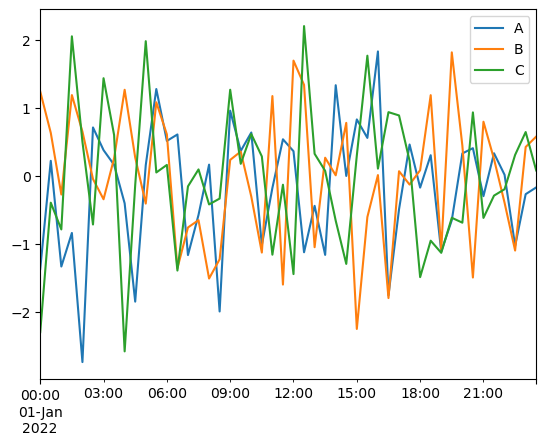

In [103]:
df.plot()
plt.legend(loc='best')
plt.show()

In [105]:
df2 = df.cumsum()
df2

,A,B,C
2022-01-01 00:00:00,-1.368164,1.240031,-2.295070
2022-01-01 00:30:00,-1.146478,1.872254,-2.688192
2022-01-01 01:00:00,-2.477595,1.598887,-3.474339
2022-01-01 01:30:00,-3.315213,2.786257,-1.423955
2022-01-01 02:00:00,-6.049683,3.437210,-0.923657
2022-01-01 02:30:00,-5.337799,3.391476,-1.637269
2022-01-01 03:00:00,-4.959043,3.048447,-0.202462
2022-01-01 03:30:00,-4.796034,3.307887,0.398918
2022-01-01 04:00:00,-5.198596,4.572861,-2.178461
2022-01-01 04:30:00,-7.045281,4.843465,-2.314187


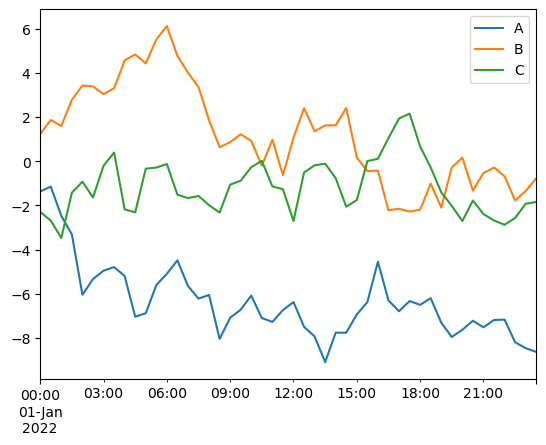

In [107]:
df2.plot()
plt.legend(loc='best')
#plt.legend(loc='right')
plt.show()